## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [43]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [44]:
ori_data = pd.read_csv('Titanic_train.csv')

## 觀察 Age

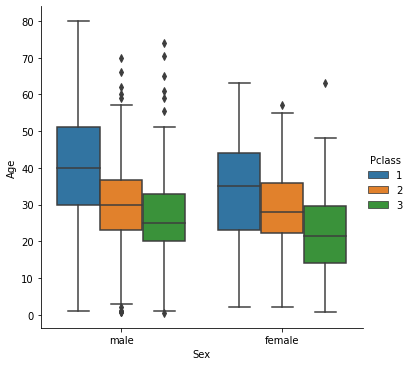

In [45]:
sns.catplot(data=ori_data,x='Sex',y='Age',kind='box',hue='Pclass')

In [59]:
data = ori_data.copy()

from sklearn import preprocessing
le= preprocessing.LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data = data[['Age','Pclass','Sex']]
display(data[data.isnull().values==True])

,Age,Pclass,Sex
5,NaN,3,1
17,NaN,2,1
19,NaN,3,0
26,NaN,3,1
28,NaN,3,0
...,...,...,...
859,NaN,3,1
863,NaN,3,0
868,NaN,3,1
878,NaN,3,1


In [53]:
missing = data.isnull()
print(missing.sum())

Age       177
Pclass      0
Sex         0
dtype: int64


In [63]:
value_neighbors = 1
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,weights='uniform')
data_filled = pd.DataFrame(imputer.fit_transform(data),columns=['Age','Pclass','Sex'])
display(data_filled[missing.values==True])

,Age,Pclass,Sex
5,22.0,3.0,1.0
17,35.0,2.0,1.0
19,26.0,3.0,0.0
26,22.0,3.0,1.0
28,26.0,3.0,0.0
...,...,...,...
859,22.0,3.0,1.0
863,26.0,3.0,0.0
868,22.0,3.0,1.0
878,22.0,3.0,1.0


In [64]:
data_filled['Age'].isnull().sum()

0